In [ ]:
#ダミー変数化は不要っぽい
#正解データ = MPG,燃費?

In [8]:
from pandas.errors import InvalidIndexError
import pandas as pd
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


In [9]:
#読み込み
df2 = pd.read_csv('auto_mgp.csv')
df2

,Unnamed: 0,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
0,0,18.0,8,307.0,130.0,3504,12.0,70,1
1,1,15.0,8,350.0,165.0,3693,11.5,70,1
2,2,18.0,8,318.0,150.0,3436,11.0,70,1
3,3,16.0,8,304.0,150.0,3433,12.0,70,1
4,4,17.0,8,302.0,140.0,3449,10.5,70,1
...,...,...,...,...,...,...,...,...,...
393,393,27.0,4,140.0,86.0,2790,15.6,82,1
394,394,44.0,4,97.0,52.0,2130,24.6,82,2
395,395,32.0,4,135.0,84.0,2295,11.6,82,1
396,396,28.0,4,120.0,79.0,2625,18.6,82,1


In [10]:
train_val,test = train_test_split(df2,test_size = 0.2,
                                  random_state = 0)

In [11]:
train_val.isnull().sum()

Unnamed: 0      0
MPG             0
Cylinders       0
Displacement    0
Horsepower      5
Weight          0
Acceleration    0
Model Year      0
Origin          0
dtype: int64

In [12]:
train_val_mean = train_val.mean()
train_val2=train_val.fillna(train_val_mean)


In [13]:
#欠損値の確認
train_val2.isnull().sum()

Unnamed: 0      0
MPG             0
Cylinders       0
Displacement    0
Horsepower      0
Weight          0
Acceleration    0
Model Year      0
Origin          0
dtype: int64

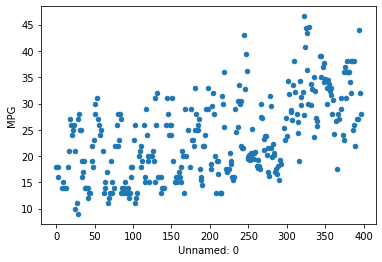

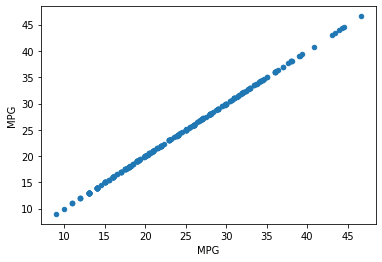

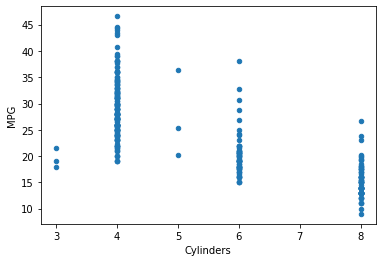

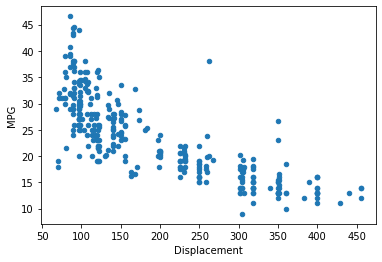

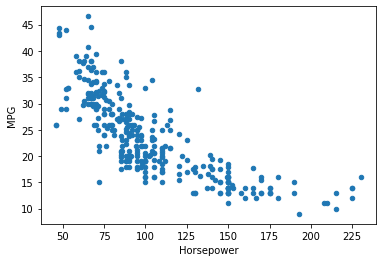

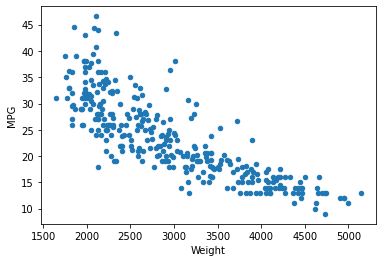

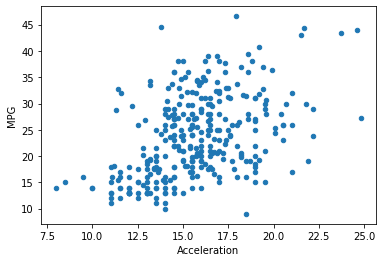

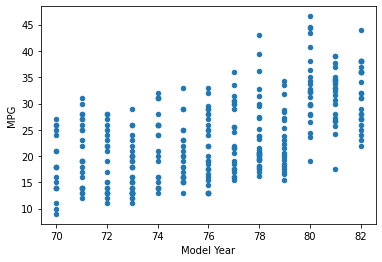

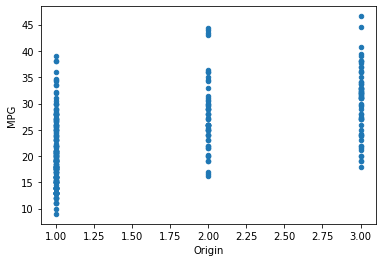

In [14]:
#散布図を描写して外れ値を探す
colname = train_val2.columns
for name in colname:
  train_val2.plot(kind = 'scatter',x = name,y = 'MPG')

In [15]:
#外れ値のあるインデックスを確認
out_line1 = train_val2[(train_val2['MPG'] > 35) &
                       (train_val2['Displacement'] > 250)].index
print(out_line1)

Int64Index([387], dtype='int64')


In [16]:
train_val3 =train_val2.drop([387],axis = 0)

外れ値削除


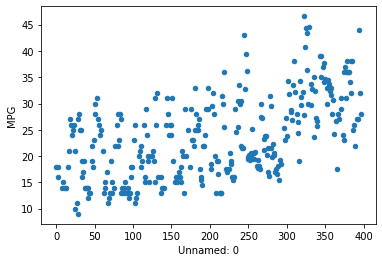

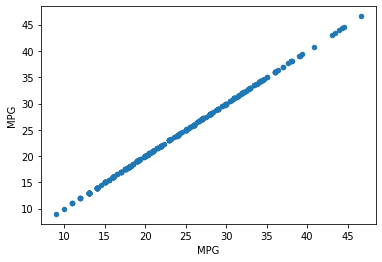

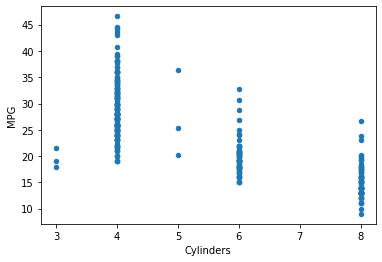

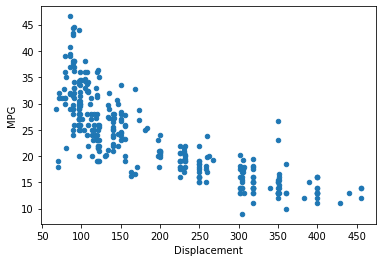

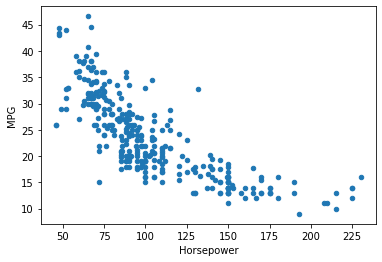

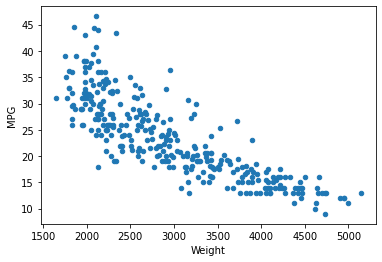

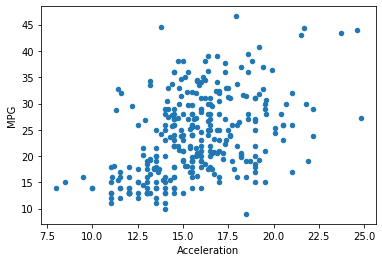

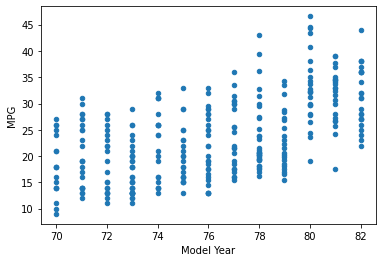

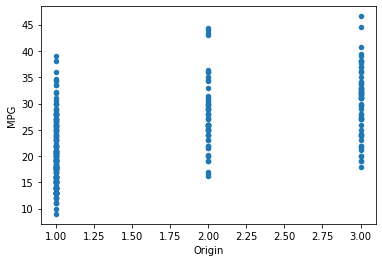

In [17]:
colname = train_val3.columns
for name in colname:
  train_val3.plot(kind = 'scatter',x = name,y = 'MPG')

In [18]:
col = ['MPG','Cylinders','Displacement','Horsepower','Weight','Acceleration','Model Year','Origin']

train_val4 = train_val3[col]
train_val4.head(3)

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
64,15.0,8,318.0,150.0,4135,13.5,72,1
55,27.0,4,97.0,60.0,1834,19.0,71,2
317,34.3,4,97.0,78.0,2188,15.8,80,2


In [19]:
train_val4.corr()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
MPG,1.000000,-0.772369,-0.807965,-0.788586,-0.828652,0.462570,0.569262,0.582215
Cylinders,-0.772369,1.000000,0.950480,0.835923,0.892465,-0.505272,-0.333773,-0.567765
Displacement,-0.807965,0.950480,1.000000,0.894243,0.933676,-0.542653,-0.353566,-0.619901
Horsepower,-0.788586,0.835923,0.894243,1.000000,0.863366,-0.682464,-0.407420,-0.473434
Weight,-0.828652,0.892465,0.933676,0.863366,1.000000,-0.420461,-0.292003,-0.592483
Acceleration,0.462570,-0.505272,-0.542653,-0.682464,-0.420461,1.000000,0.309400,0.219888
Model Year,0.569262,-0.333773,-0.353566,-0.407420,-0.292003,0.309400,1.000000,0.183413
Origin,0.582215,-0.567765,-0.619901,-0.473434,-0.592483,0.219888,0.183413,1.000000


In [20]:
train_cor = train_val4.corr()['MPG']
train_cor

MPG             1.000000
Cylinders      -0.772369
Displacement   -0.807965
Horsepower     -0.788586
Weight         -0.828652
Acceleration    0.462570
Model Year      0.569262
Origin          0.582215
Name: MPG, dtype: float64

In [21]:
print(abs(1))
print(abs(-2))

1
2


In [22]:
se = pd.Series([1,-2,3,-4])

se.map(abs)

0    1
1    2
2    3
3    4
dtype: int64

In [23]:
abs_cor = train_cor.map(abs)
abs_cor

MPG             1.000000
Cylinders       0.772369
Displacement    0.807965
Horsepower      0.788586
Weight          0.828652
Acceleration    0.462570
Model Year      0.569262
Origin          0.582215
Name: MPG, dtype: float64

In [24]:
abs_cor.sort_values(ascending = False)

MPG             1.000000
Weight          0.828652
Displacement    0.807965
Horsepower      0.788586
Cylinders       0.772369
Origin          0.582215
Model Year      0.569262
Acceleration    0.462570
Name: MPG, dtype: float64

**スコアをたたきだす**

In [25]:
col = ['Weight','Displacement','Horsepower']
x = train_val4[col]
t = train_val4[['MPG']]

x_train,x_val,y_train,y_val = train_test_split(x,t,test_size = 0.2,random_state=0)

In [26]:
from sklearn.preprocessing import StandardScaler

sc_model_x = StandardScaler()
sc_model_x.fit(x_train)

sc_x = sc_model_x.transform(x_train)
sc_x

array([[-9.76090308e-01, -9.31028993e-01, -9.83645855e-01],
       [-1.12530316e+00, -1.04979137e+00, -1.03750162e+00],
       [-2.89711198e-01, -1.09927570e+00,  1.74253032e-01],
       [-8.86562598e-01, -6.83607368e-01, -4.72016114e-01],
       [-9.64153280e-01, -7.92472883e-01, -6.33583400e-01],
       [-1.06084321e+00, -1.10917256e+00, -9.02862211e-01],
       [-8.82981490e-01, -1.00030705e+00, -8.75934330e-01],
       [ 2.33130629e-01,  5.83191351e-01, -8.49006449e-01],
       [ 1.12721403e+00,  3.95150916e-01,  1.74253032e-01],
       [-9.99964364e-01, -9.21132128e-01, -9.02862211e-01],
       [-4.38924048e-01, -1.78867254e-01,  3.08892438e-01],
       [ 2.46261360e-01,  1.09782833e+00,  6.85882773e-01],
       [-1.20886235e+00, -1.10917256e+00, -9.83645855e-01],
       [ 1.78255686e+00,  1.57287785e+00,  1.52064709e+00],
       [-1.39388629e+00, -9.90410183e-01, -1.36063619e+00],
       [-1.32823263e+00, -9.90410183e-01, -9.83645855e-01],
       [-7.91066374e-01, -7.13297963e-01

In [27]:
tmp_df = pd.DataFrame(sc_x,columns = x_train.columns)

tmp_df.mean()

Weight          1.799176e-17
Displacement   -1.158494e-16
Horsepower      2.031752e-16
dtype: float64

In [28]:
tmp_df.std()

Weight          1.001982
Displacement    1.001982
Horsepower      1.001982
dtype: float64

In [29]:
sc_model_y = StandardScaler()
sc_model_y.fit(y_train)

sc_y = sc_model_y.transform(y_train)

**モデルの作成と学習**

In [30]:
model = LinearRegression()
model.fit(sc_x,sc_y)

LinearRegression()

In [31]:
model.score(x_val,y_val)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


-34905.89196917619

In [32]:
sc_x_val = sc_model_x.transform(x_val)

In [33]:
sc_y_val = sc_model_y.transform(y_val)

model.score(sc_x_val,sc_y_val)

0.684668987490802

In [34]:
sc_model_x2 = StandardScaler()
sc_model_x2.fit(x_val)
sc_x_val = sc_model_x2.transform(x_val)
sc_model_y2 = StandardScaler()
sc_model_y2.fit(y_val)
sc_y_val = sc_model_y2.transform(y_val)
model.score(sc_x_val,sc_y_val)


0.6879762147422754

In [55]:
def learn(x,t):
  x_train,x_val,y_train,y_val = train_test_split(x,t,test_size = 0.2,random_state=0)

  sc_model_x = StandardScaler()
  sc_model_y = StandardScaler()
  sc_model_x.fit(x_train)
  sc_x_train = sc_model_x.transform(x_train)
  sc_model_y.fit(y_train)
  sc_y_train = sc_model_y.transform(y_train)

  model = LinearRegression()
  model.fit(sc_x_train,sc_y_train)
  sc_x_val = sc_model_x.transform(x_val)
  sc_y_val = sc_model_y.transform(y_val)

  train_score = model.score(sc_x_train,sc_y_train)
  val_score = model.score(sc_x_val,sc_y_val)

  return train_score,val_score


In [56]:
x = train_val3.loc[:,['Weight','Displacement','Horsepower']]
t = train_val3[['MPG']]

s1,s2 = learn(x,t)
print(s1,s2)


0.7144606277778914 0.684668987490802


In [57]:
x = train_val3.loc[:,['Weight','Displacement','Horsepower','Cylinders']]
t = train_val3[['MPG']]
s1,s2 = learn(x,t)
print(s1,s2)

0.716437940863518 0.6765610506100268


In [59]:
x['Weight'] ** 2

64     17098225
55      3363556
317     4787344
102     3802500
358     6943225
         ...   
323     7840000
192    11242609
117     3485689
47     10771524
172     4941729
Name: Weight, Length: 317, dtype: int64

In [67]:
x['Weight2'] = x['Weight'] ** 2

x.head(2)

,Weight,Displacement,Horsepower,Weight2
64,4135,318.0,150.0,17098225
55,1834,97.0,60.0,3363556


In [68]:
s1,s2=learn(x,t)
print(s1,s2)

0.7379970874651185 0.7272442049922678


In [85]:
x['Weight2'] = x['Weight'] ** 4


In [86]:
s1,s2=learn(x,t)
print(s1,s2)

0.7375756650094436 0.7237906672955594
